# Sentiment Analysis using Deep learning

#  Install and load some packages

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

2.10.0


In [2]:
%python -m pip install git+https://git@github.com/lvsuno/Text-preprocessing.git

  Cloning https://****@github.com/lvsuno/Text-preprocessing.git to /private/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/pip-req-build-6gzsbv5r
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/lvsuno/Text-preprocessing.git' /private/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/pip-req-build-6gzsbv5r
  Resolved https://****@github.com/lvsuno/Text-preprocessing.git to commit c17e60a4fae6b70b9247760daa05248fcc981b7b
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-lvsuno: filename=preprocess_lvsuno-0.0.4-py3-none-any.whl size=3800 sha256=4d3bac165ed9b74b6ca90309f2676a47329bcd4107287106c6a470545a5a7e3f
  Stored in directory: /private/var/folders/7v/syzn01012_3fnr7bzfw4zzl40000gp/T/pip-ephem-wheel-cache-nvwgtbn7/wheels/1e/6b/54/83a9ab63261b01ffa4e7f32a2529208f449833e5954c7f80d6
Successfully built preprocess-lvsuno


In [3]:
%pip install -U spacy
%python -m spacy download en_core_web_lg

  Using cached spacy-3.5.1-cp310-cp310-macosx_11_0_arm64.whl (6.6 MB)
  Using cached srsly-2.4.6-cp310-cp310-macosx_11_0_arm64.whl (490 kB)
  Using cached preshed-3.0.8-cp310-cp310-macosx_11_0_arm64.whl (101 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached murmurhash-1.0.9-cp310-cp310-macosx_11_0_arm64.whl (19 kB)
  Using cached thinc-8.1.9-cp310-cp310-macosx_11_0_arm64.whl (775 kB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl (29 kB)
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Using cached cymem-2.0.7-cp310-cp310-macosx_11_0_arm64.whl (30 kB)
  Using cached pydantic-1.10.7-cp310-cp310-macosx_11_0_arm64.whl (2.5 MB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached wasabi-1.1.1-py3-none-any.whl (27 kB)
  Using cached blis-0.7.9-cp310-cp310-macosx_11_0

In [6]:
import pandas as pd
import numpy as np
import spacy
import preprocess_lvsuno as pl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

## Load the dataset and define some preprocessing operations
   * Removing emails, urls, html tags, specials characters, accented characters
   * Get word of vec

In [7]:
df = pd.read_csv('data/imdb_reviews.txt', sep='\t', header=None)
df.columns = ['reviews', 'sentiment']

In [89]:
nlp = spacy.load('en_core_web_lg')

def get_vec(w):
    """
    param w: sentences or an ensemble of sentence
    :return: a word vector
    """
    do = nlp(w)
    vec = do.vector
    return vec

In [9]:
def pre_pro(x):
    x = str(x).lower()
    x = pl.cont_exp(x)
    x = pl.remove_emails(x)
    x = pl.remove_html_tags(x)
    x = pl.remove_urls(x)
    x = pl.remove_special_chars(x)
    x = pl.remove_accented_chars(x)
    vec = get_vec(x)
    return vec

In [10]:
df['vec'] = df['reviews'].apply(pre_pro)
df['vec'].shape

/Users/elvist/miniconda3/envs/tensorflow/lib/python3.10/site-packages/preprocess_lvsuno/utils.py:170: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(x, 'lxml').get_text().strip()


(748,)

In [11]:
X= df['vec'].to_numpy()
X = X.reshape(-1, 1)
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)
y = df['sentiment']

In [12]:
X.shape

(748, 300)

* Split into Training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

**Standardize the features**

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building and Training

### A simple network with three Relu layers (with dense connection) and sigmoid at end

In [15]:
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-03-30 21:11:33.666477: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-30 21:11:33.666717: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [16]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(X_train, y_train, batch_size=4, epochs=20)

Epoch 1/20


2023-03-30 21:11:52.189016: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-30 21:11:52.419168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


150/150 [==============================] - 3s 12ms/step - loss: 0.6950 - accuracy: 0.5351
Epoch 2/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6849 - accuracy: 0.5619
Epoch 3/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6755 - accuracy: 0.6037
Epoch 4/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6669 - accuracy: 0.6054
Epoch 5/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6575 - accuracy: 0.6438
Epoch 6/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6478 - accuracy: 0.6572
Epoch 7/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6336 - accuracy: 0.6789
Epoch 8/20
150/150 [==============================] - 1s 9ms/step - loss: 0.6318 - accuracy: 0.6689
Epoch 9/20
150/150 [==============================] - 1s 10ms/step - loss: 0.6214 - accuracy: 0.6773
Epoch 10/20
150/150 [==============================] - 1s 10ms/step - loss: 0.6101 - accuracy: 0.6923
Epoch 1

#### Confusion Matrix

In [24]:
y.value_counts()

1    386
0    362
Name: sentiment, dtype: int64

In [25]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [26]:
confusion_matrix(y_test, y_pred)

array([[50, 23],
       [16, 61]])

In [28]:
from mlxtend.plotting import plot_confusion_matrix

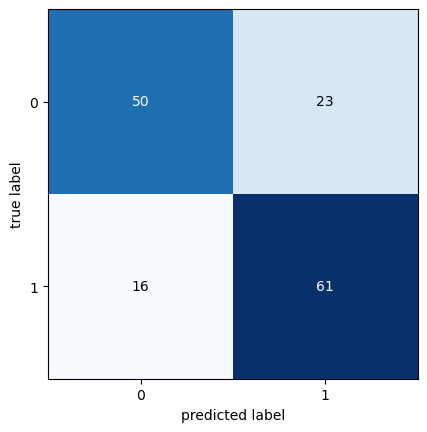

In [29]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        73
           1       0.73      0.79      0.76        77

    accuracy                           0.74       150
   macro avg       0.74      0.74      0.74       150
weighted avg       0.74      0.74      0.74       150



### 1D CNN network

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, BatchNormalization, Dropout

In [34]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 299, 32)           96        
                                                                 
 batch_normalization_8 (Batc  (None, 299, 32)          128       
 hNormalization)                                                 
                                                                 
 dropout_16 (Dropout)        (None, 299, 32)           0         
                                                                 
 flatten_8 (Flatten)         (None, 9568)              0         
                                                                 
 dense_20 (Dense)            (None, 64)                612416    
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                      

In [68]:
epochs = 20
model.compile(optimizer=Adam(0.00001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20


2023-03-30 22:19:07.991942: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 0.7908 - accuracy: 0.4866

2023-03-30 22:19:09.666622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 2s 77ms/step - loss: 0.7908 - accuracy: 0.4866 - val_loss: 0.6917 - val_accuracy: 0.5267
Epoch 2/20
19/19 [==============================] - 0s 23ms/step - loss: 0.7021 - accuracy: 0.5652 - val_loss: 0.6887 - val_accuracy: 0.5667
Epoch 3/20
19/19 [==============================] - 0s 17ms/step - loss: 0.6712 - accuracy: 0.6154 - val_loss: 0.6864 - val_accuracy: 0.6133
Epoch 4/20
19/19 [==============================] - 0s 20ms/step - loss: 0.6494 - accuracy: 0.6288 - val_loss: 0.6845 - val_accuracy: 0.6400
Epoch 5/20
19/19 [==============================] - 0s 18ms/step - loss: 0.6209 - accuracy: 0.6438 - val_loss: 0.6820 - val_accuracy: 0.6533
Epoch 6/20
19/19 [==============================] - 0s 17ms/step - loss: 0.6185 - accuracy: 0.6505 - val_loss: 0.6793 - val_accuracy: 0.6667
Epoch 7/20
19/19 [==============================] - 0s 17ms/step - loss: 0.6063 - accuracy: 0.6739 - val_loss: 0.6759 - val_accuracy: 0.6667
Epoch 8/20
19/19 [======

In [64]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

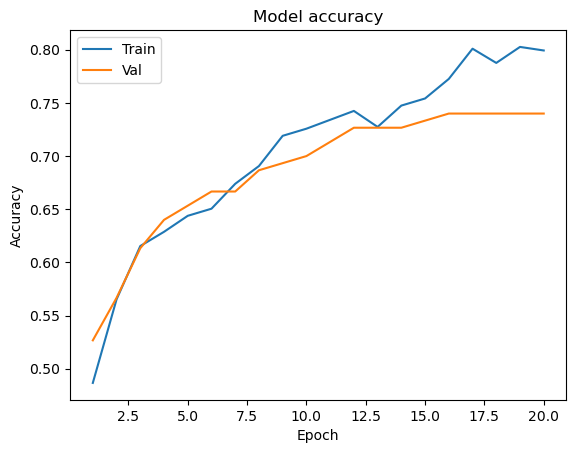

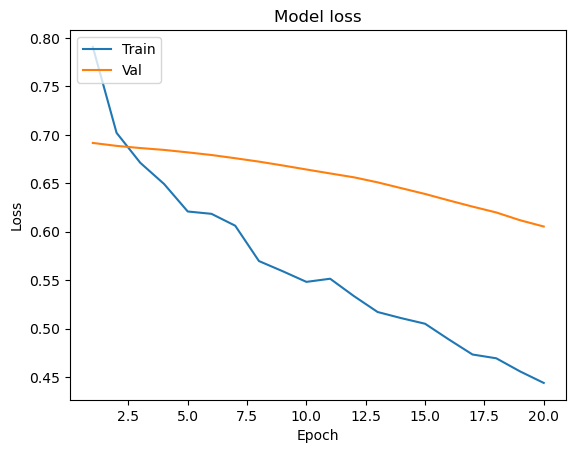

In [69]:
plot_learningCurve(history, epochs)

5/5 [==============================] - 0s 14ms/step


2023-03-30 22:22:25.997697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

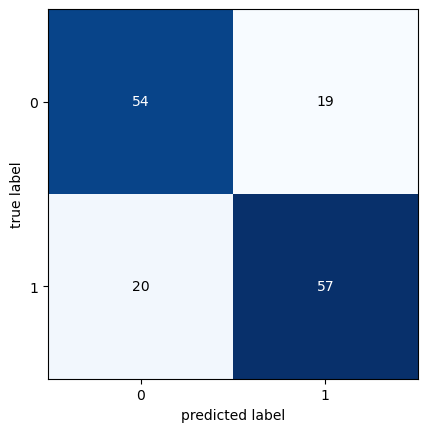

In [71]:
plot_confusion_matrix(confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32")))

### Save and load the model and predict a new entry

In [73]:
from tensorflow.keras.models import load_model

model.save('models/1d_cnn', save_format='h5')

In [74]:
model = load_model('models/1d_cnn')

In [90]:
def get_pred(x, model, scaler):
  x = pre_pro(x)
  vec = x.reshape(1, -1)

  vec = scaler.transform(vec)

  vec = vec.reshape(1, 300, 1)
  
  y_pred = (model.predict(vec) > 0.5).astype("int32")

  return y_pred

In [91]:
x = 'it was a nice movie. thanks for making it'
get_pred(x, model, scaler)

2023-03-30 22:37:34.402308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 490ms/step


array([[1]], dtype=int32)